In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
test_data_numeric = test_data.select_dtypes(include='number')
test_data_numeric

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,NaN,0,0,8.0500


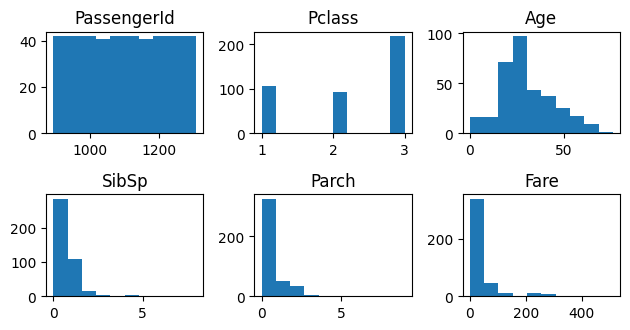

In [10]:
plt.Figure(figsize=(10,10))
for i, col in enumerate(test_data_numeric.columns):
    plt.subplot(3,3,i+1)
    plt.hist(test_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
# for categorial
test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])


In [14]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

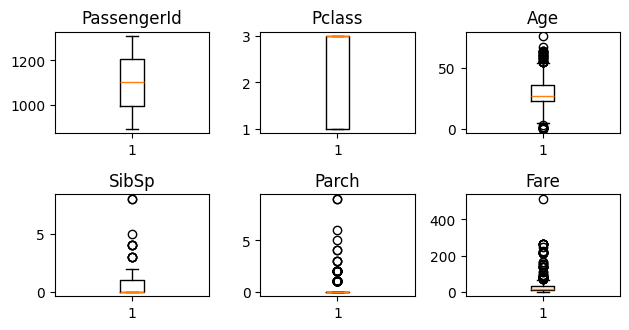

In [15]:
plt.Figure(figsize=(10,10))
for i, col in enumerate(test_data_numeric.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(test_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
def handling_outlier(columns):
    for i in columns:
        lower_quantile = test_data[i].quantile(.25)
        upper_quantile = test_data[i].quantile(.75)

        IQR = upper_quantile-lower_quantile
        lower_bound = lower_quantile-1.5*IQR
        upper_bound = upper_quantile+1.5*IQR

        test_data[i] = np.where(test_data[i]<lower_bound,lower_bound,test_data[i])
        test_data[i] = np.where(test_data[i]>upper_bound,upper_bound,test_data[i])
handling_outlier(test_data_numeric)

<Figure size 640x480 with 0 Axes>

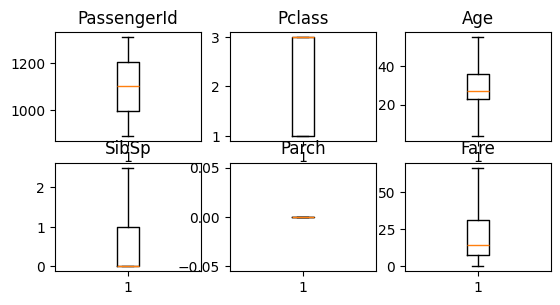

In [ ]:
def plotting(test_data_numeric):
    plt.Figure(figsize=(10,10))
    for i, col in enumerate(test_data_numeric.columns):
        plt.subplot(3,3,i+1)
        plt.boxplot(test_data[col])
        plt.title(col)
plt.tight_layout() 
plt.show()
plotting(test_data_numeric)